In [31]:
import glob, os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

C:\Users\Jared Bauman\Desktop\kaggle\whales


**Label file analysis**

In [42]:
# read label csv
CSV_PATH = 'C:/Users/Jared Bauman/Desktop/kaggle/whales/'
df = pd.read_csv(CSV_PATH+'train.csv')
print(df.head())
print(len(df))

# get unique whales
whales = df['Id'].drop_duplicates().values
print(len(whales))

# there are on average ~5 unique pictures per whale. What does this look like distributionally?
count = df.groupby('Id').count().sort_values('Image', ascending=False).reset_index()

# there are ~9.5K examples in the new whales class, dominating all others
print(count.head())

# ~2K whales only have one sample image... this will make validation conceptually difficult
print(len(count[count['Image']==1]))

# yikes ~4K whales have less than five images... this will be tough!
print(len(count[count['Image']<=5]))

           Image         Id
0  0000e88ab.jpg  w_f48451c
1  0001f9222.jpg  w_c3d896a
2  00029d126.jpg  w_20df2c5
3  00050a15a.jpg  new_whale
4  0005c1ef8.jpg  new_whale
25361
5005
          Id  Image
0  new_whale   9664
1  w_23a388d     73
2  w_9b5109b     65
3  w_9c506f6     62
4  w_0369a5c     61
2073
4371


**Image rescaling analysis**

In [3]:
# test image read
READ_PATH = 'C:/Users/Jared Bauman/Desktop/kaggle/whales/train/'
WRITE_PATH = 'C:/Users/Jared Bauman/Desktop/kaggle/whales/train_resized/'

files = glob.glob(READ_PATH+'*')
widths, heights = zip(*[Image.open(f).size for f in files])

In [33]:
# about 2/3 of files have roughly the same length
x = pd.Series(widths)
print(x.describe())
print(x.quantile(.23))
print(x.quantile(.98))

UsageError: Line magic function `%md` not found.


In [5]:
# less than 40% of files have roughtly the same length
x = pd.Series(heights)
print(x.describe())
print(x.quantile(.30))
print(x.quantile(.98))

count    25361.000000
mean       512.894799
std        156.108327
min         30.000000
25%        400.000000
50%        525.000000
75%        631.000000
max       1575.000000
dtype: float64
436.0
753.7999999999993


In [15]:
# 80/20 solution... let's rescale to (1050,750) so few images lose granularity.
# We'll try adding original scale as suplemental variables later on

# sanity check--do the images look reasonable?
def resize_ten(READ_PATH, WRITE_PATH, new_width, new_height):
    length = len(READ_PATH)
    files = glob.glob(READ_PATH+'*')[:10]
    for f in files:
        out = WRITE_PATH + f[length:]
        Image.open(f).resize(size=(new_width, new_height)).save(out)

resize_ten(READ_PATH, WRITE_PATH, 1050, 750)

In [29]:
NUM_COLORS = 3
NEW_WIDTH = 1050
NEW_HEIGHT = 750

# let's work with one example
file = glob.glob(READ_PATH+'*')[0]
print(file)

t = (np.array(list(Image
    .open(file)
    .resize(size=(NEW_WIDTH, NEW_HEIGHT))
    .getdata()))
    .reshape((NEW_HEIGHT, NEW_WIDTH, NUM_COLORS))
)


print(t[:10])
print(t[:10].shape)


C:/Users/Jared Bauman/Desktop/kaggle/whales/train\0000e88ab.jpg
[[[ 50  77  94]
  [ 54  81  98]
  [ 51  78  95]
  ...
  [ 82 109 139]
  [ 76 103 132]
  [ 63  90 119]]

 [[ 29  56  75]
  [ 31  58  75]
  [ 27  54  73]
  ...
  [ 95 122 152]
  [ 88 115 144]
  [ 73 100 129]]

 [[ 27  54  75]
  [ 30  57  76]
  [ 27  52  74]
  ...
  [ 90 115 145]
  [ 82 107 137]
  [ 66  91 121]]

 ...

 [[ 84 111 140]
  [ 98 125 154]
  [ 98 125 154]
  ...
  [ 51  75 101]
  [ 55  79 107]
  [ 49  73  99]]

 [[ 84 111 140]
  [ 98 125 154]
  [ 98 125 154]
  ...
  [ 51  75 101]
  [ 55  79 107]
  [ 49  73  99]]

 [[ 69  96 125]
  [ 84 111 140]
  [ 91 118 147]
  ...
  [ 62  88 115]
  [ 69  94 124]
  [ 63  89 116]]]
(10, 1050, 3)


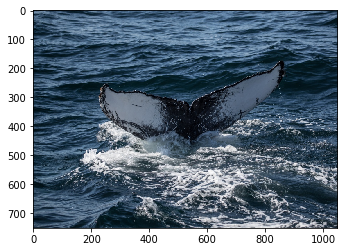

In [28]:
# double check that we've reshaped correctly
plt.imshow(t)